# Report

## Results

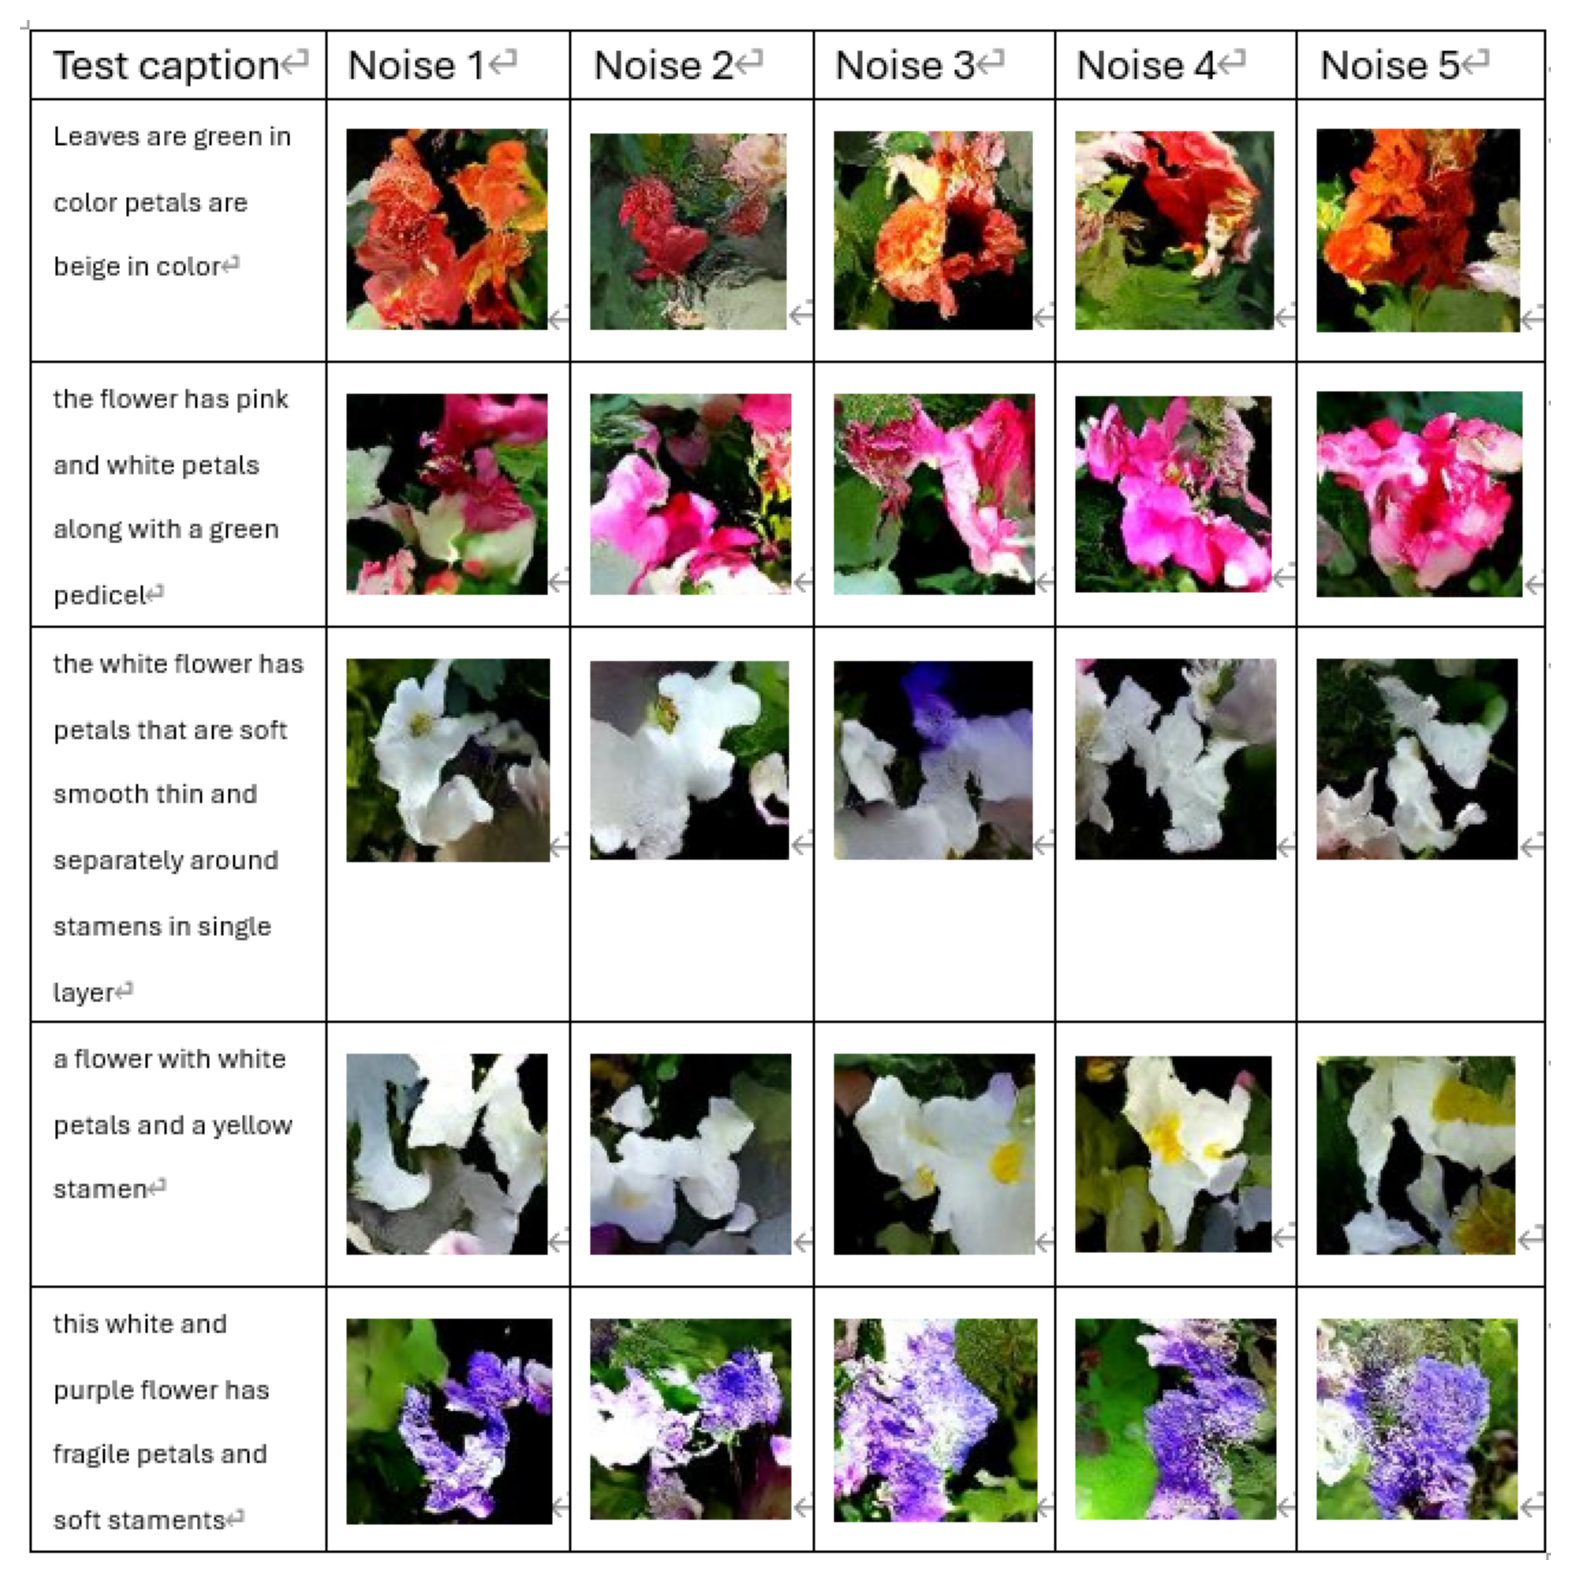

In [11]:
# read image
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('text-to-image.png')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image inline using Matplotlib
plt.figure(figsize=(10, 10), dpi=200)
plt.imshow(image_rgb)
plt.axis("off")  # Hide axes
plt.show()


## Data augmentation and preprocess

We only perform random horizontal flip on images, because if too many augmentations are applied, it might not be realistic and different from the caption.  
For embedding model, we use clip-vit-large-patch14 as our model. The reason we choose clip over bert is that clip model is specifically trained to align textual and visual representations in a shared latent space, while bert is trained exclusively on text data for natural language understanding tasks. Also we use clip-large instead of clip because it's output dimension (768) is larger, which might contain more information.

## Conditional diffusion model

We use conditional diffusion model as our model. And we use the classic U-net as our backbone structure for training.   
We use text encoder to encode the caption and perform cross-attention between encoded caption and image.  
The embedded text features are considered as our condition. We add the cross-attention only in our bottleneck layers of the unet.  
During inference, we use DDIM to improve inference speed. We tried different sample steps from 20~100.  
For more detailed implementation please refer to the above code.

## Classifier free guidance

In order to further improve our model, we apply classifier free guidance.  
This technique is used to balance unconditional and conditional generation. We will get both unconditional and conditional output, and blend two of them to get the final output.  
By modifying the hyperparameter which controls the ratio of unconditional and conditional output, we can greatly improve our output.
`
## Conclusion
This competition is a really practical task for us to learn how to build a generative AI model.  
We tried both GAN and diffusion model. However, we can't train GAN successfully. Therefore, we focus on how to improve diffusion model. 
We are satisfied with the final result 8th place.
Most importantly, We are very thankful to professor and TAs for your guidance and support throughout this semester.